# Writing the Code to Perform the Sorting Algorithms and Counting the Number of Comparisons Involved

## Merge Sort

In [3]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

def merge_comparisons(A1, A2):
    #requires space complexity associated with array size length(A1+A2)
    result = [] 
    comparisons = 0
    i, j = 0, 0
   
    while i < len(A1) and j < len(A2):
        comparisons += 1
        if A1[i] <= A2[j]:
            result.append(A1[i])
            i += 1
        else:
            result.append(A2[j])
            j += 1
    
    # transfering the remaining sorted elements of a sub-array when the other is empty
    result.extend(A1[i:])
    result.extend(A2[j:])
    return result, comparisons
        
def mergeSort_comparisons(A):
    size = len(A)
    comparisons = 0
    if size > 1:
        A1 = A[:size//2]
        A2 = A[size//2:]
        A1_sorted, comp1 = mergeSort_comparisons(A1) 
        A2_sorted, comp2 = mergeSort_comparisons(A2)
        merged, merge_comp = merge_comparisons(A1_sorted, A2_sorted)
        return merged, comp1 + comp2 + merge_comp
    return A, comparisons

In [4]:
list1 = [10,9,8,7,6,5,4,3,2,1]
print(mergeSort_comparisons(list1))

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 19)


## Insertion Sort

In [5]:
def insertionSort_comparisons(A):
    size = len(A)
    comparisons = 0
    if size == 1: #array of size 1 is already sorted
        return A, comparisons
  
    else: #size <= S, excecute insertion sort
        for i in range(1,size):
            for j in range(i, 0, -1):
                comparisons += 1
                if A[j] < A[j-1]:
                    A[j],A[j-1] = A[j-1],A[j]         
                else:
                    break
        return A, comparisons  

In [6]:
list1 = [1,2,3,4,5]
print(insertionSort_comparisons(list1))

([1, 2, 3, 4, 5], 4)


## Hybrid Sort

In [7]:
def hybridSort_comparisons(A, S):
    size = len(A)
    comparisons = 0
    if size == 1: #array of size 1 is already sorted
        return A, comparisons
    
    elif size > S: #merge sort when size > s
        A1 = A[:size//2]
        A2 = A[size//2:]
        A1_sorted, comp1 = hybridSort_comparisons(A1, S) 
        A2_sorted, comp2 = hybridSort_comparisons(A2, S)
        merged, merge_comp = merge_comparisons(A1_sorted, A2_sorted)
        return merged, comp1 + comp2 + merge_comp
    
    else: #size <= S, excecute insertion sort
        for i in range(1,size):
            for j in range(i, 0, -1):
                comparisons += 1
                if A[j] < A[j-1]:
                    A[j],A[j-1] = A[j-1],A[j]         
                else:
                    break
        return A, comparisons

In [8]:
list1 = [4,2,10,100,3,59,43]
print(hybridSort_comparisons(list1, 3))

([2, 3, 4, 10, 43, 59, 100], 11)


## Theoretical Calculations for best and worst cases, depending on size and threshold value

In [9]:
def best_case_comparisons(n, s):
    s = 2 ** int(np.floor(np.log2(s)))
    return (n/2) * np.log2(n / s) + n*(s-1)/s       

def worst_case_comparisons(n, s):
    s = 2 ** int(np.floor(np.log2(s)))
    return (n - 1) * np.log2(n/s) + 1 + n*(s-1)/2 

# Generating arrays of random sizes from 1000 to 10,000,000

In [17]:
min_size = 1_000        
max_size = 10_000_000

min_value = 0
max_value = 10_000  

S = 16

# Open a CSV file for writing
with open('random_arrays.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Random Size', 'Comparisons'])

    # to ensure we have at a few arrays in every range       
    for i in range(3):
        random_size = np.random.randint(1000, 10_001)
        random_array = np.random.randint(min_value, max_value, random_size)
        _, comparisons = hybridSort_comparisons(random_array, S)
        # Write the array as a single row in the CSV file
        writer.writerow([random_size, comparisons])
        
    for i in range(8):
        random_size = np.random.randint(10_000, 100_001)
        random_array = np.random.randint(min_value, max_value, random_size)
        _, comparisons = hybridSort_comparisons(random_array, S)
        writer.writerow([random_size, comparisons])
        
    for i in range(20):
        random_size = np.random.randint(100_000, 1_000_001)
        random_array = np.random.randint(min_value, max_value, random_size)
        _, comparisons = hybridSort_comparisons(random_array, S)
        writer.writerow([random_size, comparisons])
        
    for i in range(90):
        random_size = np.random.randint(1_000_000, 10_000_001)
        random_array = np.random.randint(min_value, max_value, random_size)
        _, comparisons = hybridSort_comparisons(random_array, S)
        writer.writerow([random_size, comparisons])

In [6]:
df = pd.read_csv('random_arrays.csv')
df.head()

,Random Size,Comparisons
0,1617,17136
1,3072,34955
2,3828,46614
3,77919,1218385
4,69110,1068777


## Comparing the results with the theoretical worst and best cases

In [7]:
df['best_case_comparisons'] = best_case_comparisons(df['Random Size'], 16)
df['worst_case_comparisons'] = worst_case_comparisons(df['Random Size'], 16)

df.head()

,Random Size,Comparisons,best_case_comparisons,worst_case_comparisons
0,1617,17136,6899.823054,2.288961e+04
1,3072,34955,14530.502401,4.633442e+04
2,3828,46614,18713.895969,5.895339e+04
3,77919,1218385,550290.764284,1.538865e+06
4,69110,1068777,482097.775003,1.352928e+06


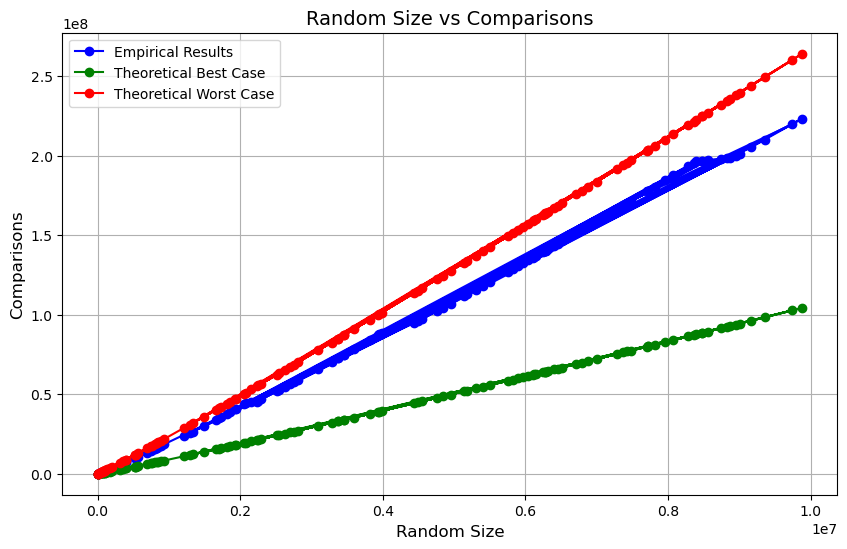

In [8]:
#Plot Random Size (x-axis) and Comparisons (y-axis)
plt.figure(figsize=(10, 6))
plt.plot(df['Random Size'], df['Comparisons'], marker='o', linestyle='-', color='b', label='Empirical Results')
plt.plot(df['Random Size'], df['best_case_comparisons'], marker='o', linestyle='-', color='g', label='Theoretical Best Case')
plt.plot(df['Random Size'], df['worst_case_comparisons'], marker='o', linestyle='-', color='r', label='Theoretical Worst Case')

#Labelling
plt.xlabel('Random Size', fontsize=12)
plt.ylabel('Comparisons', fontsize=12)
plt.title('Random Size vs Comparisons', fontsize=14)

plt.grid(True)
plt.legend()
plt.show()

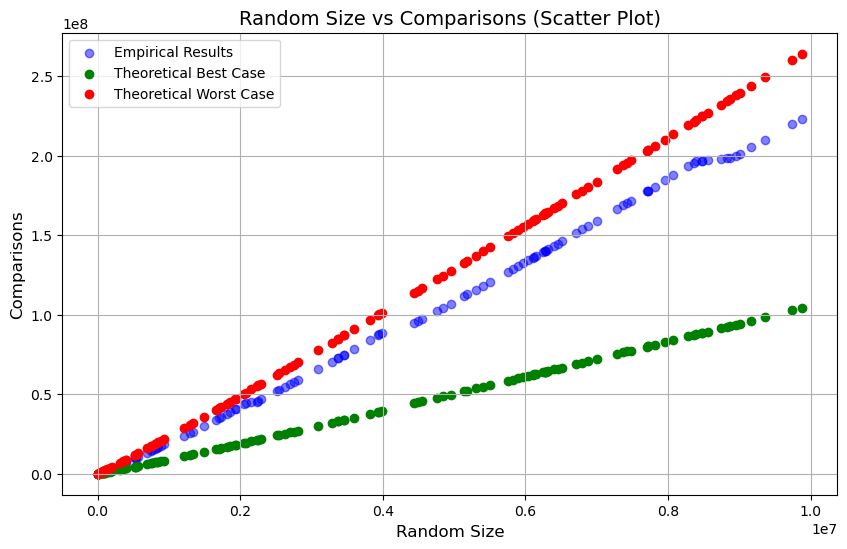

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Random Size'], df['Comparisons'], color='b', alpha=0.5, label='Empirical Results')
plt.scatter(df['Random Size'], df['best_case_comparisons'], marker='o', linestyle='-', color='g', label='Theoretical Best Case')
plt.scatter(df['Random Size'], df['worst_case_comparisons'], marker='o', linestyle='-', color='r', label='Theoretical Worst Case')


plt.xlabel('Random Size', fontsize=12)
plt.ylabel('Comparisons', fontsize=12)
plt.title('Random Size vs Comparisons (Scatter Plot)', fontsize=14)

plt.grid(True)
plt.legend()
plt.show()

# Sorting an Array of fixed size, but with varying values of s

In [10]:
min_size = 1_000        
max_size = 10_000_000

min_value = 0
max_value = 10_000  

# Open a CSV file for writing
with open('fixed_n_varying_s.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Size','S', 'Comparisons'])
    
    #picking 5 sizes to see the optimal value later:
    for i in range(5):
        random_size = np.random.randint(1000, 10_000_001)
        for S in range(1, 25):
            random_array = np.random.randint(min_value, max_value, random_size)
            _, comparisons = hybridSort_comparisons(random_array, S)
            writer.writerow([random_size, S, comparisons])    

In [11]:
df_2 = pd.read_csv('fixed_n_varying_s.csv')
df_2.head()

,Size,S,Comparisons
0,6132399,1,130640934
1,6132399,2,130639421
2,6132399,3,130640319
3,6132399,4,130640737
4,6132399,5,130727241


In [35]:
df_2['best_case_comparisons'] = df_2.apply(lambda row: best_case_comparisons(row['Size'], row['S']), axis=1)
df_2['worst_case_comparisons'] = df_2.apply(lambda row: worst_case_comparisons(row['Size'], row['S']), axis=1)

df_2.head()

,Size,S,Comparisons,best_case_comparisons,worst_case_comparisons
0,6132399,1,130640934,6.913673e+07,1.382734e+08
1,6132399,2,130639421,6.913673e+07,1.352072e+08
2,6132399,3,130640319,6.913673e+07,1.352072e+08
3,6132399,4,130640737,6.760363e+07,1.352072e+08
4,6132399,5,130727241,6.760363e+07,1.352072e+08


## Comparing varying values of s, for different array sizes

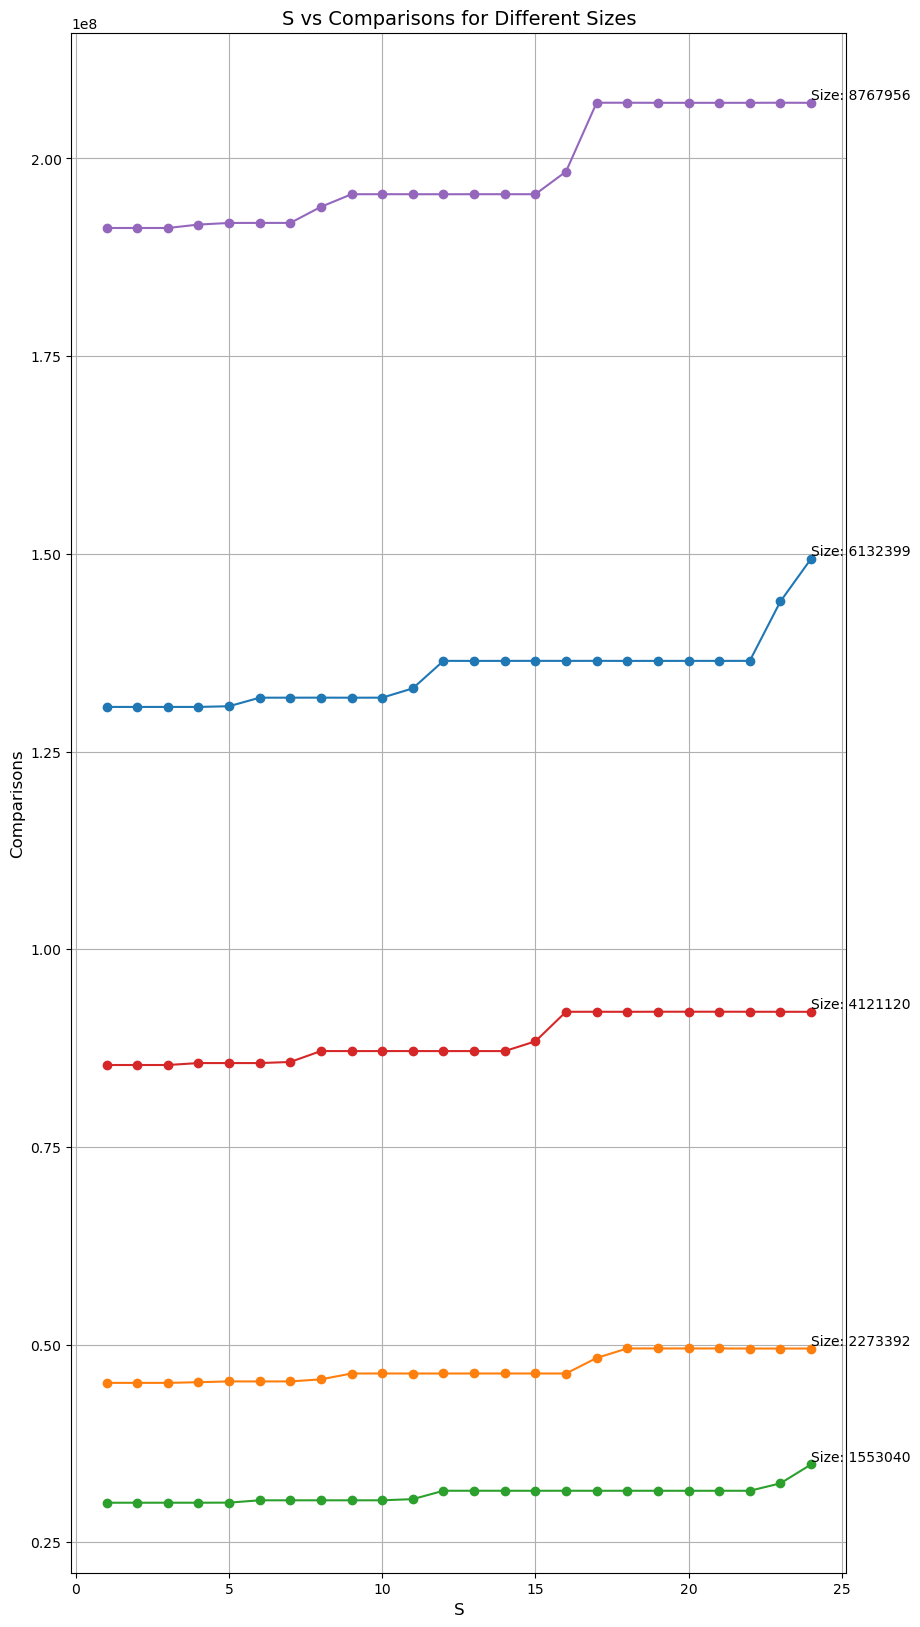

In [50]:
# Get unique values of Size
unique_sizes = df_2['Size'].unique()

# Define a list of dark colors for plotting
colors = [
    '#1f77b4',  # Dark Blue
    '#ff7f0e',  # Dark Orange
    '#2ca02c',  # Dark Green
    '#d62728',  # Dark Red
    '#9467bd',  # Dark Purple
    '#8c564b',  # Dark Brown
    '#e377c2'   # Dark Pink
]

# Create a plot for each unique Size
plt.figure(figsize=(10, 20))
for i, n_value in enumerate(unique_sizes):
    df_2_filtered = df_2[df_2['Size'] == n_value]
    
    plt.plot(df_2_filtered['S'], df_2_filtered['Comparisons'], 
             marker='o', linestyle='-', color=colors[i % len(colors)])
    
    # Adding label next to the line with a larger y-offset
    plt.text(df_2_filtered['S'].iloc[-1], df_2_filtered['Comparisons'].iloc[-1] + 5,  # Adjust the offset value as needed
             f'Size: {n_value}', fontsize=10, verticalalignment='bottom', horizontalalignment='left')

# Labelling
plt.xlabel('S', fontsize=12)
plt.ylabel('Comparisons', fontsize=12)
plt.title('S vs Comparisons for Different Sizes', fontsize=14)

plt.grid(True)
plt.show()


## Comparing with theoretical best and worst cases

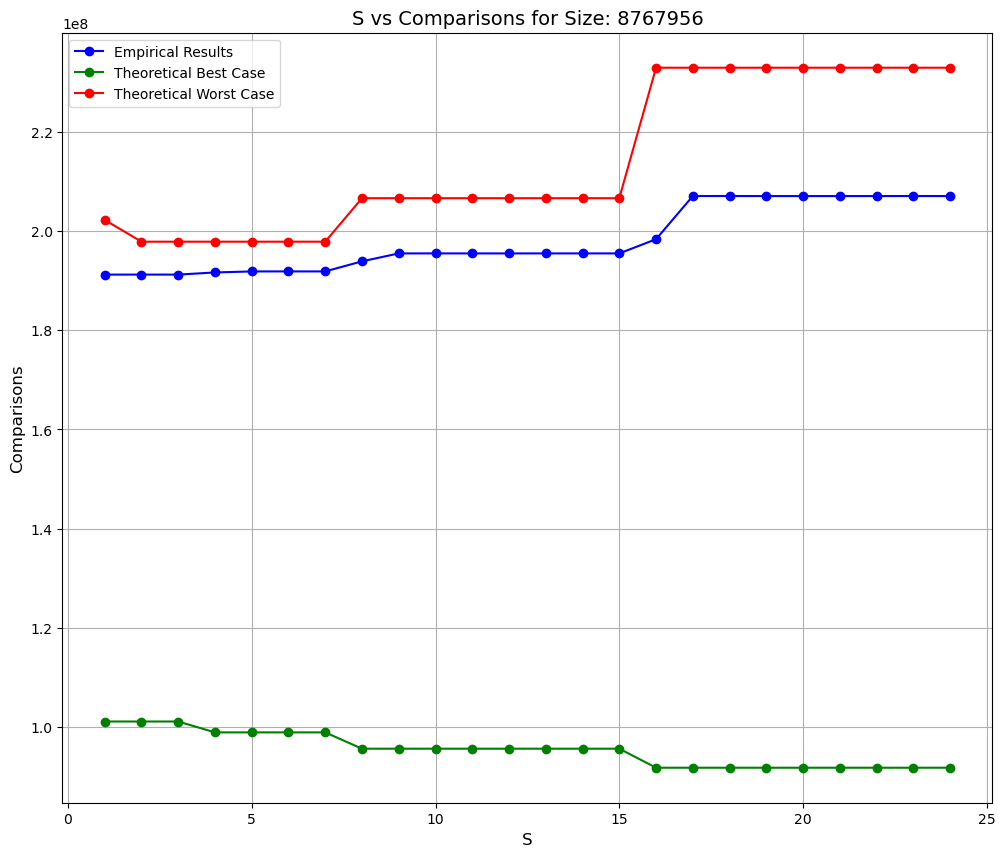

In [43]:
#Plot S (x-axis) and Comparisons (y-axis)
n_value = 8767956
df_2_filtered = df_2[df_2['Size'] == n_value]

plt.figure(figsize=(12, 10))
plt.plot(df_2_filtered['S'], df_2_filtered['Comparisons'], marker='o', linestyle='-', color='b', label='Empirical Results')
plt.plot(df_2_filtered['S'], df_2_filtered['best_case_comparisons'], marker='o', linestyle='-', color='g', label='Theoretical Best Case')
plt.plot(df_2_filtered['S'], df_2_filtered['worst_case_comparisons'], marker='o', linestyle='-', color='r', label='Theoretical Worst Case')

#Labelling
plt.xlabel('S', fontsize=12)
plt.ylabel('Comparisons', fontsize=12)
plt.title('S vs Comparisons' + ' for Size: ' + str(n_value), fontsize=14)


plt.grid(True)
plt.legend()
plt.show()

# Direct approach to finding Optimal S
The Optimal S would be the largest value of the size of the array for which the number of key comparisons made by Insertion Sort is less than that made by Merge Sort.

Insertion Sort is faster for small datasets. Until we reach the threshold S, using Insertion Sort minimizes the time taken due to fewer comparisons.

After we pass the value of S, Merge Sort takes over as the better option because it handles larger datasets more effectively through its recursive approach.

In the following graphs we compare for Insertion Sort and Merge Sort as the size of the array increases.

In [90]:
min_value = 0
max_value = 10_000  

with open('insertionSort_vs_mergeSort1.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Size','insertionSort_comparisons', 'mergeSort_comparisons'])
    
    for size in range(1, 25):
        random_array = np.random.randint(min_value, max_value, size)
        _, mergeSortComparisons = mergeSort_comparisons(random_array)
        _, insertionSortComparisons = insertionSort_comparisons(random_array)
        writer.writerow([size, insertionSortComparisons, mergeSortComparisons])
        
with open('insertionSort_vs_mergeSort2.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Size','insertionSort_comparisons', 'mergeSort_comparisons'])
    
    for size in range(1, 25):
        random_array = np.random.randint(min_value, max_value, size)
        _, mergeSortComparisons = mergeSort_comparisons(random_array)
        _, insertionSortComparisons = insertionSort_comparisons(random_array)
        writer.writerow([size, insertionSortComparisons, mergeSortComparisons])
        
with open('insertionSort_vs_mergeSort3.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Size','insertionSort_comparisons', 'mergeSort_comparisons'])
    
    for size in range(1, 25):
        random_array = np.random.randint(min_value, max_value, size)
        _, mergeSortComparisons = mergeSort_comparisons(random_array)
        _, insertionSortComparisons = insertionSort_comparisons(random_array)
        writer.writerow([size, insertionSortComparisons, mergeSortComparisons])

In [91]:
df_3 = pd.read_csv('insertionSort_vs_mergeSort1.csv')
df_3.head()

,Size,insertionSort_comparisons,mergeSort_comparisons
0,1,0,0
1,2,1,1
2,3,3,3
3,4,5,5
4,5,8,7


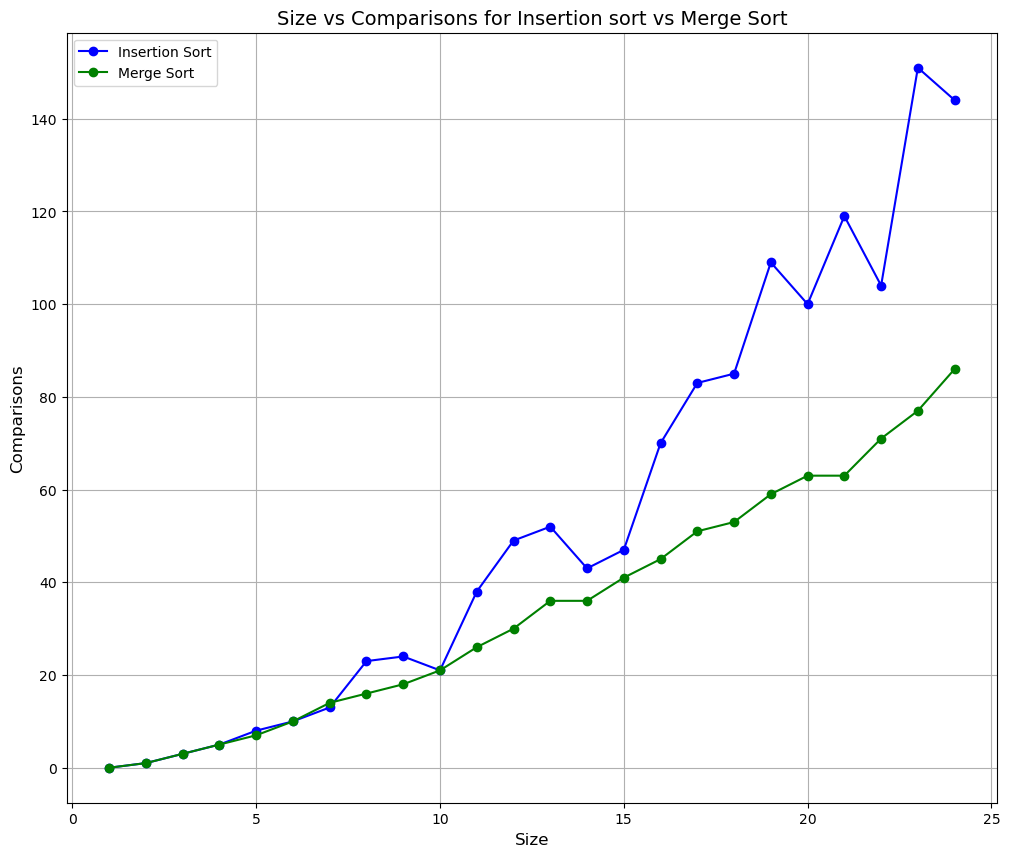

In [93]:
#Plot Size (x-axis) and Comparisons (y-axis) for both insertion and merge sort
plt.figure(figsize=(12, 10))
plt.plot(df_3['Size'], df_3['insertionSort_comparisons'], marker='o', linestyle='-', color='b', label='Insertion Sort')
plt.plot(df_3['Size'], df_3['mergeSort_comparisons'], marker='o', linestyle='-', color='g', label='Merge Sort')

#Labelling
plt.xlabel('Size', fontsize=12)
plt.ylabel('Comparisons', fontsize=12)
plt.title('Size vs Comparisons for Insertion sort vs Merge Sort', fontsize=14)

plt.grid(True)
plt.legend()
plt.show()

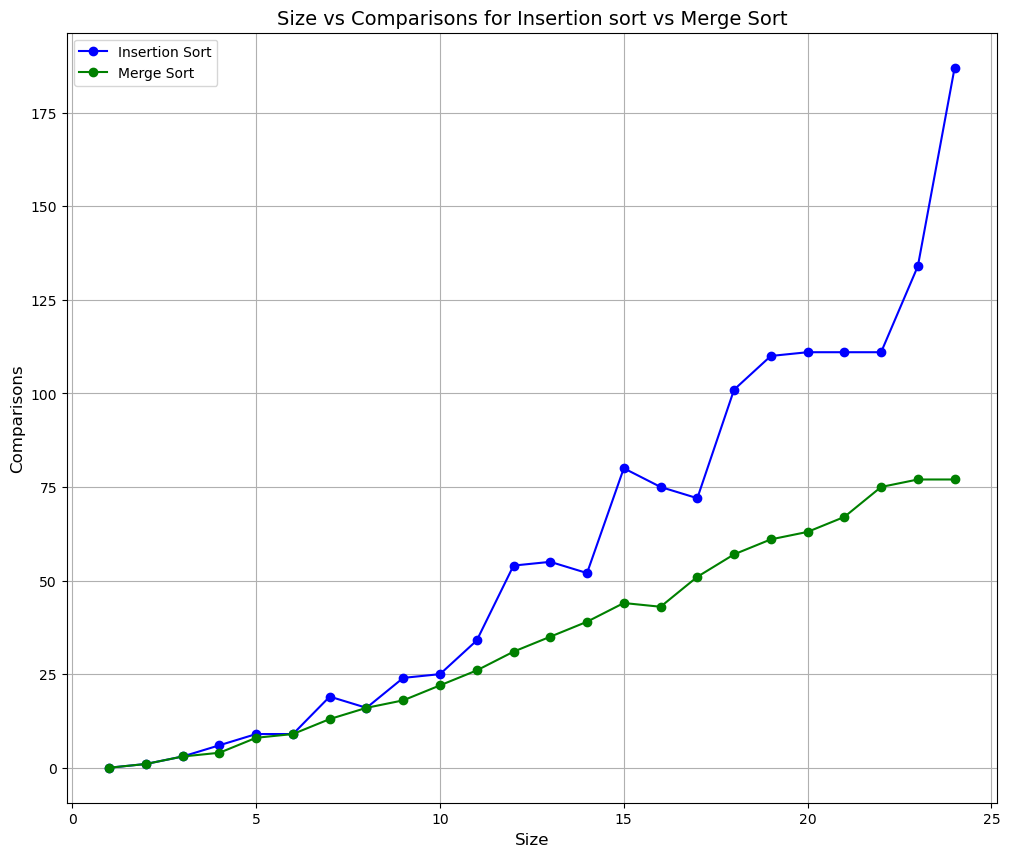

In [94]:
df_4 = pd.read_csv('insertionSort_vs_mergeSort2.csv')


#Plot Size (x-axis) and Comparisons (y-axis) for both insertion and merge sort
plt.figure(figsize=(12, 10))
plt.plot(df_4['Size'], df_4['insertionSort_comparisons'], marker='o', linestyle='-', color='b', label='Insertion Sort')
plt.plot(df_4['Size'], df_4['mergeSort_comparisons'], marker='o', linestyle='-', color='g', label='Merge Sort')

#Labelling
plt.xlabel('Size', fontsize=12)
plt.ylabel('Comparisons', fontsize=12)
plt.title('Size vs Comparisons for Insertion sort vs Merge Sort', fontsize=14)

plt.grid(True)
plt.legend()
plt.show()

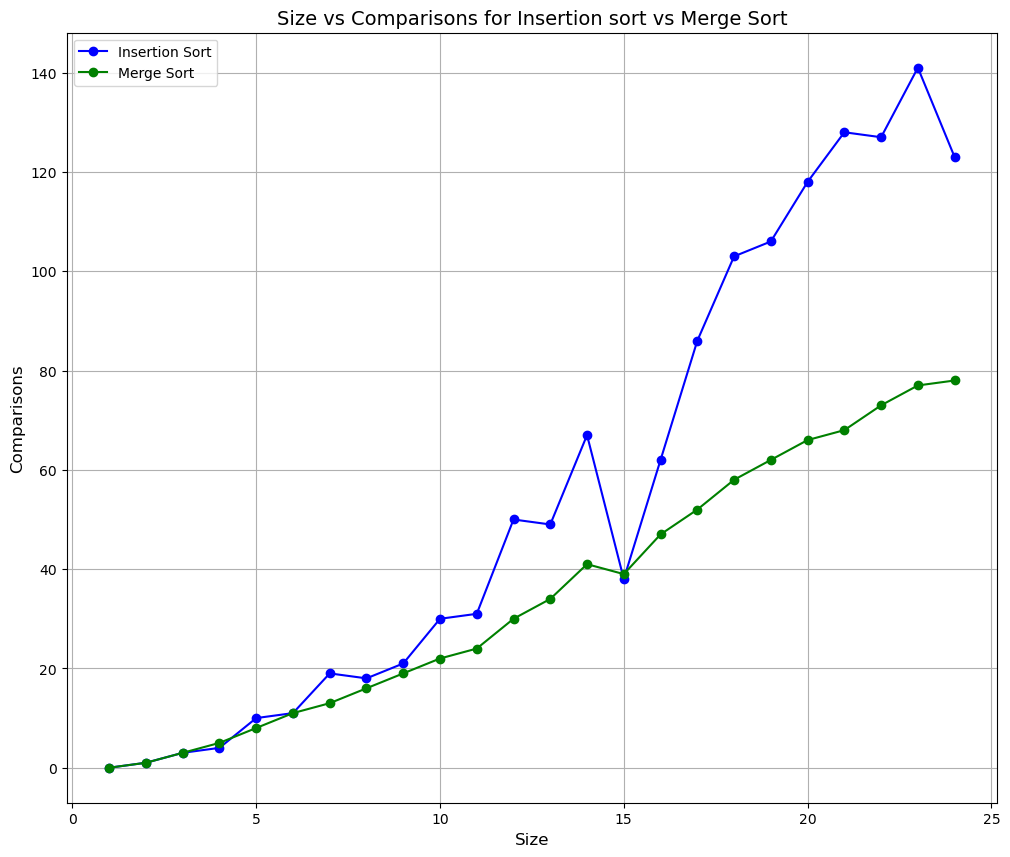

In [89]:
df_5 = pd.read_csv('insertionSort_vs_mergeSort3.csv')


#Plot Size (x-axis) and Comparisons (y-axis) for both insertion and merge sort
plt.figure(figsize=(12, 10))
plt.plot(df_5['Size'], df_5['insertionSort_comparisons'], marker='o', linestyle='-', color='b', label='Insertion Sort')
plt.plot(df_5['Size'], df_5['mergeSort_comparisons'], marker='o', linestyle='-', color='g', label='Merge Sort')

#Labelling
plt.xlabel('Size', fontsize=12)
plt.ylabel('Comparisons', fontsize=12)
plt.title('Size vs Comparisons for Insertion sort vs Merge Sort', fontsize=14)

plt.grid(True)
plt.legend()
plt.show()

# Conclusion
We decided to observe 3 graphs because we do not know whether these arrays are in the worst case (requires more comparisons) or best case (requires fewer comparisons).

This allows to see that the optimal value for s will be between 8 to 12, those are the values where the two lines intersect and we can see a huge diversion getting bigger from the line representing insertion sort and the one representing merge sort.

We believe that the CPU time will give a more specific optimal value of s.

## Running with CPU Times
Using the range of values we obtained from the graphs earlier, we further compared their CPU runtimes to narrow down the value of S which would be most efficient.

In [10]:
import time
from tabulate import tabulate

min_size = 1_000        
max_size = 10_000_000
min_value = 0
max_value = 10_000  
i = 5  # Number of iterations to take the average

# List of specific S values to use
s_values = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# Store the results in a list for tabulation
results = []

# Picking sizes to see the optimal value:
for _ in range(1):  # Modify this range based on how many sizes you want to test
    random_size = np.random.randint(min_size, max_size + 1)
    
    for S in s_values:
        total_comparisons = 0
        total_time = 0
        
        # Repeat the sorting `i` times to get an average
        for _ in range(i):
            random_array = np.random.randint(min_value, max_value, random_size)
            
            # Measure the time taken for comparisons in hybridSort_comparisons
            start_time = time.process_time()  # Start the timer for CPU time
            _, comparisons = hybridSort_comparisons(random_array, S)
            end_time = time.process_time()  # End the timer for CPU time
            
            # Accumulate total comparisons and time
            total_comparisons += comparisons
            total_time += (end_time - start_time)
        
        # Calculate the average comparisons and run time
        avg_comparisons = total_comparisons / i
        avg_run_time = total_time / i
        
        # Add the results to the list
        results.append([random_size, S, avg_comparisons, avg_run_time])

# Print the table
headers = ['Size', 'S', 'Avg Comparisons', 'Avg Run Time (seconds)']
print(tabulate(results, headers=headers, tablefmt="pretty"))


+---------+----+-----------------+------------------------+
|  Size   | S  | Avg Comparisons | Avg Run Time (seconds) |
+---------+----+-----------------+------------------------+
| 7172728 | 5  |   154619757.8   |   52.22735499999999    |
| 7172728 | 6  |   154823820.2   |   52.22857180000001    |
| 7172728 | 7  |   156516116.6   |   54.97256420000012    |
| 7172728 | 8  |   156519697.6   |   51.74430599999996    |
| 7172728 | 9  |   156517395.6   |   51.380714199999964   |
| 7172728 | 10 |   156517367.0   |   51.30709739999993    |
| 7172728 | 11 |   156517608.8   |   52.262752400000046   |
| 7172728 | 12 |   156519568.0   |   52.52123139999994    |
| 7172728 | 13 |   158463272.4   |   56.01373799999983    |
| 7172728 | 14 |   163526026.2   |   65.25531679999986    |
| 7172728 | 15 |   163525335.4   |   63.20556639999995    |
+---------+----+-----------------+------------------------+


Having considered the values around and in the range 8-12 that we identified earlier, we can see that the runtime when S = 10 is the shortest, which makes it the most optimal S value.

In [14]:
import time
from tabulate import tabulate
import numpy as np

min_size = 1_000        
max_size = 10_000_000
min_value = 0
max_value = 10_000  
i = 5  # Number of iterations to take the average

# List of specific S values to use
#s_values = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

S = 10

# Store the results in a list for tabulation
results = []

# Picking sizes to see the optimal value:
for _ in range(6):  # Modify this range based on how many sizes you want to test
    random_size = np.random.randint(min_size, max_size + 1)
    
    #for S in s_values:
    total_comparisons_hybrid = 0
    total_time_hybrid = 0
    total_comparisons_merge = 0
    total_time_merge = 0
        
        # Repeat the sorting `i` times to get an average
    for _ in range(i):
            random_array = np.random.randint(min_value, max_value, random_size)
            
            # Measure the time taken for comparisons in hybridSort_comparisons
            start_time = time.process_time()  # Start the timer for CPU time
            _, comparisons = hybridSort_comparisons(random_array, S)
            end_time = time.process_time()  # End the timer for CPU time
            
            # Accumulate total comparisons and time
            total_comparisons_hybrid += comparisons
            total_time_hybrid += (end_time - start_time)

            start_time = time.process_time()  # Start the timer for CPU time
            _, comparisons = mergeSort_comparisons(random_array)
            end_time = time.process_time()  # End the timer for CPU time

            total_comparisons_merge += comparisons
            total_time_merge += (end_time - start_time)
        
        # Calculate the average comparisons and run time
    avg_comparisons_hybrid = total_comparisons_hybrid / i
    avg_run_time_hybrid = total_time_hybrid / i
    avg_comparisons_merge = total_comparisons_merge / i
    avg_run_time_merge = total_time_merge / i
        
        # Add the results to the list
    results.append([random_size, S, avg_comparisons_hybrid, avg_comparisons_merge, avg_run_time_hybrid, avg_run_time_merge])

# Print the table
headers = ['Size', 'S', 'Avg Comparisons Hybrid','Avg Comparisons Merge', 'Avg Run Time Hybrid (seconds)', 'Avg Run Time Merge(seconds)']
print(tabulate(results, headers=headers, tablefmt="pretty"))

+---------+----+------------------------+-----------------------+-------------------------------+-----------------------------+
|  Size   | S  | Avg Comparisons Hybrid | Avg Comparisons Merge | Avg Run Time Hybrid (seconds) | Avg Run Time Merge(seconds) |
+---------+----+------------------------+-----------------------+-------------------------------+-----------------------------+
| 2170926 | 10 |       44004450.4       |      41809022.0       |       8.328247600000031       |      8.78391900000006       |
| 8328703 | 10 |      184585387.2       |      177034456.8      |      33.833501400000024       |     36.921203999999946      |
| 8788060 | 10 |      195976837.2       |      186789633.6      |       37.50415039999989       |          39.075738          |
| 9913432 | 10 |      224210943.2       |      210882348.4      |       42.21786520000014       |      43.81497159999981      |
| 2967426 | 10 |       60633483.2       |      58748155.8       |      10.959188799999902       |     11

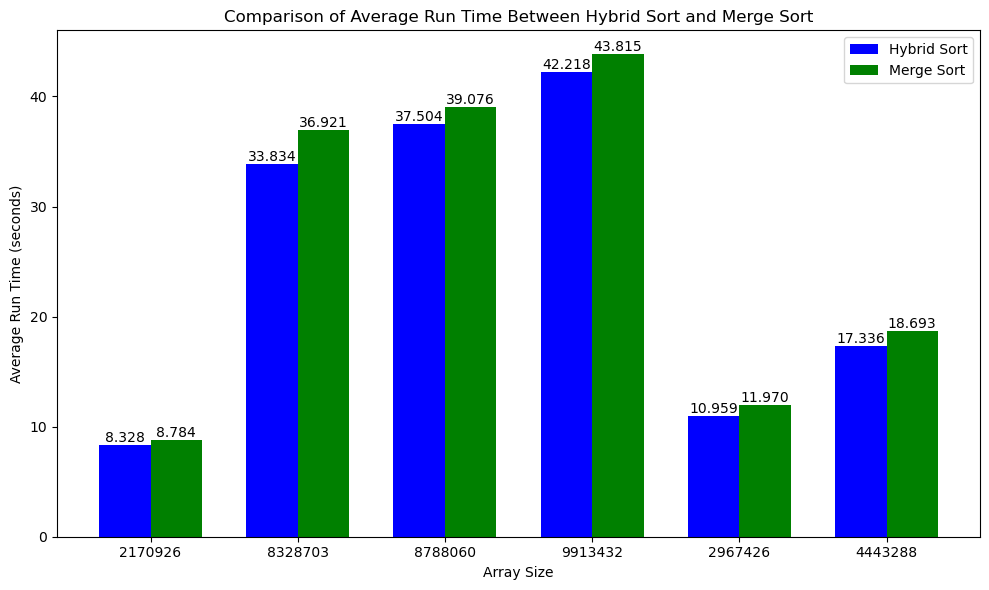

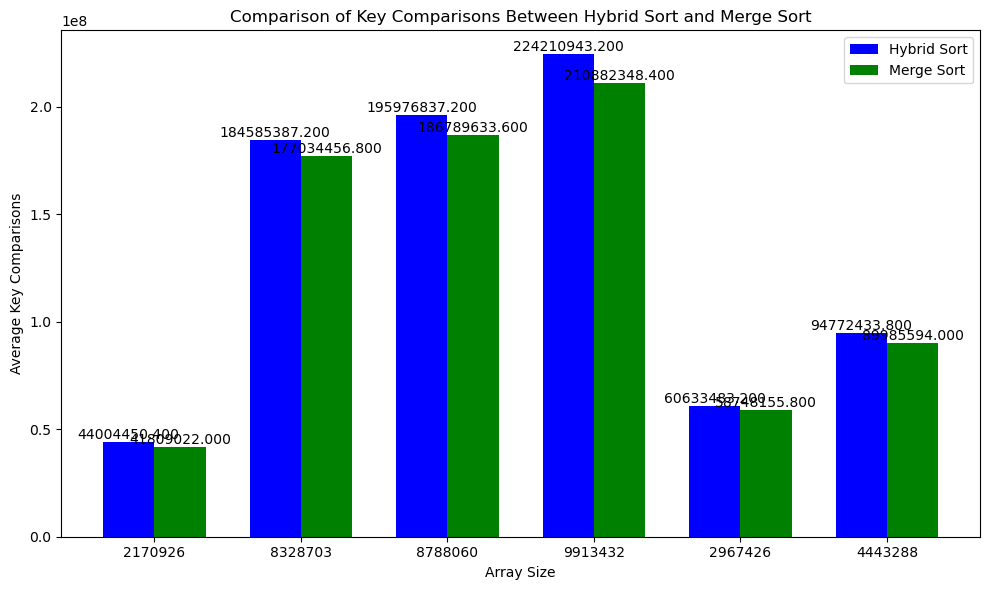

In [16]:
import matplotlib.pyplot as plt

# Function to add values on top of the bars
def add_values_on_top(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', ha='center', va='bottom')

# Plotting Run Time Comparison
def plot_run_time_comparison(sizes, run_time_hybrid, run_time_merge):
    bar_width = 0.35  # Width of the bars
    index = np.arange(len(sizes))  # The x locations for the groups

    plt.figure(figsize=(10, 6))  # Setting figure size

    # Bar plot for Hybrid Sort run times
    bars_hybrid = plt.bar(index, run_time_hybrid, bar_width, label='Hybrid Sort', color='b')

    # Bar plot for Merge Sort run times
    bars_merge = plt.bar(index + bar_width, run_time_merge, bar_width, label='Merge Sort', color='g')

    # Adding labels, title, and legend
    plt.xlabel('Array Size')
    plt.ylabel('Average Run Time (seconds)')
    plt.title('Comparison of Average Run Time Between Hybrid Sort and Merge Sort')
    plt.xticks(index + bar_width / 2, sizes)  # Setting x-tick positions and labels
    plt.legend()

    # Adding values on top of each bar
    add_values_on_top(bars_hybrid)
    add_values_on_top(bars_merge)

    # Display the plot
    plt.tight_layout()
    plt.show()

# Plotting Comparisons Comparison
def plot_comparisons_comparison(sizes, comparisons_hybrid, comparisons_merge):
    bar_width = 0.35  # Width of the bars
    index = np.arange(len(sizes))  # The x locations for the groups

    plt.figure(figsize=(10, 6))  # Setting figure size

    # Bar plot for Hybrid Sort comparisons
    bars_hybrid = plt.bar(index, comparisons_hybrid, bar_width, label='Hybrid Sort', color='b')

    # Bar plot for Merge Sort comparisons
    bars_merge = plt.bar(index + bar_width, comparisons_merge, bar_width, label='Merge Sort', color='g')

    # Adding labels, title, and legend
    plt.xlabel('Array Size')
    plt.ylabel('Average Key Comparisons')
    plt.title('Comparison of Key Comparisons Between Hybrid Sort and Merge Sort')
    plt.xticks(index + bar_width / 2, sizes)  # Setting x-tick positions and labels
    plt.legend()

    # Adding values on top of each bar
    add_values_on_top(bars_hybrid)
    add_values_on_top(bars_merge)

    # Display the plot
    plt.tight_layout()
    plt.show()

# Extracting data for plotting
sizes = [result[0] for result in results]
run_time_hybrid = [result[4] for result in results]  # Avg Run Time Hybrid
run_time_merge = [result[5] for result in results]   # Avg Run Time Merge
comparisons_hybrid = [result[2] for result in results]  # Avg Comparisons Hybrid
comparisons_merge = [result[3] for result in results]   # Avg Comparisons Merge

# Plot the run time comparison
plot_run_time_comparison(sizes, run_time_hybrid, run_time_merge)

# Plot the key comparisons comparison
plot_comparisons_comparison(sizes, comparisons_hybrid, comparisons_merge)

